# See how topic distance changes over chunk size

In [1]:
from rolling.pdf import list_pdfs, read_pdf
pdfs = list_pdfs()
len(pdfs), pdfs[:3]

(1020,
 ['./arxiv_downloads\\0808.2870v1.Measuring_Distance_and_Properties_of_the_Milky_Way_s_Central_Supermassive_Black_Hole_with_Stellar_Orbits.pdf',
  './arxiv_downloads\\0809.4677v1.Approaching_the_event_horizon__1_3mm_VLBI_of_SgrA_.pdf',
  './arxiv_downloads\\0812.0743v2.A_Novel_Clustering_Algorithm_Based_on_Quantum_Games.pdf'])

In [3]:
papers = [
    read_pdf(p) for p in pdfs
]

MuPDF error: syntax error: cannot find ExtGState resource 'A1'

MuPDF error: syntax error: cannot find ExtGState resource 'A2'

MuPDF error: syntax error: cannot find ExtGState resource 'A2'

MuPDF error: syntax error: cannot find ExtGState resource 'A2'

MuPDF error: syntax error: cannot find ExtGState resource 'A2'

MuPDF error: syntax error: cannot find ExtGState resource 'A2'

MuPDF error: syntax error: cannot find ExtGState resource 'A2'

MuPDF error: syntax error: cannot find ExtGState resource 'A2'

MuPDF error: syntax error: cannot find ExtGState resource 'A2'

MuPDF error: syntax error: cannot find ExtGState resource 'A2'

MuPDF error: syntax error: cannot find ExtGState resource 'A2'

MuPDF error: syntax error: cannot find ExtGState resource 'A2'

MuPDF error: syntax error: cannot find ExtGState resource 'A2'

MuPDF error: syntax error: cannot find ExtGState resource 'A2'

MuPDF error: syntax error: cannot find ExtGState resource 'A2'

MuPDF error: syntax error: cannot find E

In [4]:
from collections import Counter

def is_good_pdf(text):
    wc = Counter(text)
    cc = len(text)
    white_space_count = wc[' ']
    white_space_ratio = white_space_count / cc
    white_space_good = 0.25 > white_space_ratio > 0.05
    word_count_good = 20000 > len(text.split()) > 1000
    return white_space_good and word_count_good

good_paper_idcs = [
    i for i, paper in enumerate(papers) if is_good_pdf(paper)
]
good_papers = [
    papers[i] for i in good_paper_idcs
]
len(good_papers), len(papers), len(good_papers) / len(papers)

(984, 1020, 0.9647058823529412)

In [5]:
# re-calc empbeddings
from rolling.embedding import GTEEmbeddingModel
model = GTEEmbeddingModel()
model.max_size

8192

In [ ]:
import numpy as np
from rolling.pdf import chunk_text

paper_embeddings = np.array([
    np.mean(
        model.encode([c for c in chunk_text(p, 1024, hard_cut=False, overlap=True) if len(c) > 512]),
        axis=0
    ) for p in good_papers
])

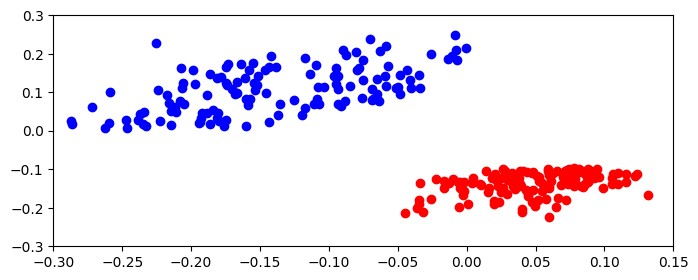

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
emb_2d = pca.fit_transform(paper_embeddings)

# find two most distant papers
from sklearn.metrics import pairwise_distances
dists = pairwise_distances(emb_2d)
i, j = np.unravel_index(np.argmax(dists), dists.shape)

N = 130
cluster_1 = np.argsort(np.linalg.norm(emb_2d - emb_2d[i], axis=1))[:N]
cluster_2 = np.argsort(np.linalg.norm(emb_2d - emb_2d[j], axis=1))[:N]
assert len(set(cluster_1).intersection(cluster_2)) == 0, "clusters overlap"
assert len(cluster_1) == N == len(cluster_2), "clusters have different sizes"

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 3))
plt.xlim(-0.3, 0.15)
plt.ylim(-0.3, 0.3)
plt.scatter(emb_2d[cluster_1, 0], emb_2d[cluster_1, 1], c='red')
plt.scatter(emb_2d[cluster_2, 0], emb_2d[cluster_2, 1], c='blue')
plt.show()

In [8]:
papers_g1 = [good_papers[i] for i in cluster_1]
papers_g2 = [good_papers[i] for i in cluster_2]
assert len(papers_g1) == len(papers_g2) == N, "clusters have different sizes"

TARGET_LENGTH = 1_000_000
text_g1 = " ".join(papers_g1)
text_g2 = " ".join(papers_g2)
assert len(text_g1) > TARGET_LENGTH, "text_g1 is too short"
assert len(text_g2) > TARGET_LENGTH, "text_g2 is too short"

text_g1 = text_g1[:TARGET_LENGTH]
text_g2 = text_g2[:TARGET_LENGTH]

In [9]:
combined_embeddings = [
    np.mean(
        model.encode(chunk_text(text, 1024, hard_cut=True, overlap=True)), axis=0
    ) for text in [text_g1, text_g2]
]

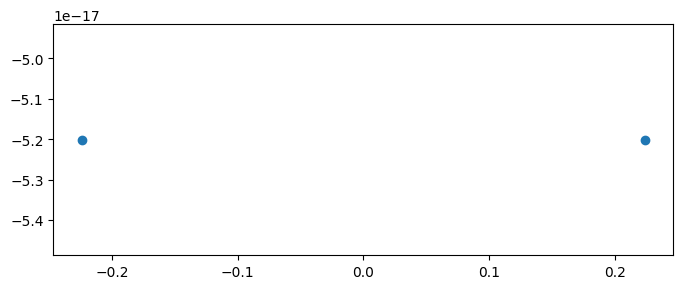

In [10]:
# plot 
emb_2d = PCA(n_components=2).fit_transform(combined_embeddings)

plt.figure(figsize=(8, 3))
plt.scatter(emb_2d[:, 0], emb_2d[:, 1])
plt.show()

---
# Test how reducing chunk size transfers to movement speed

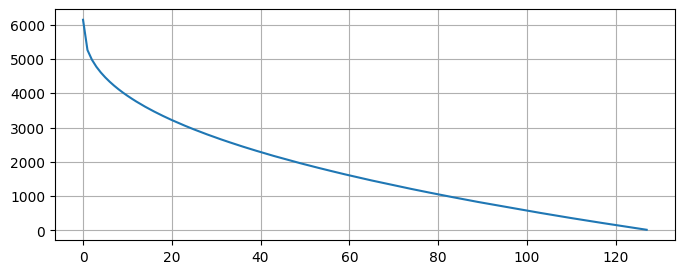

array([6144, 5261, 4979, 4774, 4607, 4464, 4337, 4222, 4116, 4018, 3927,
       3841, 3759, 3682, 3607, 3536, 3468, 3403, 3339, 3278, 3218, 3161,
       3105, 3050, 2997, 2945, 2895, 2845, 2797, 2750, 2703, 2658, 2613,
       2570, 2527, 2484, 2443, 2402, 2362, 2323, 2284, 2245, 2208, 2170,
       2134, 2097, 2062, 2026, 1992, 1957, 1923, 1890, 1857, 1824, 1791,
       1759, 1728, 1696, 1665, 1634, 1604, 1574, 1544, 1515, 1485, 1456,
       1428, 1399, 1371, 1343, 1315, 1288, 1261, 1233, 1207, 1180, 1154,
       1128, 1102, 1076, 1050, 1025, 1000,  975,  950,  925,  901,  876,
        852,  828,  805,  781,  757,  734,  711,  688,  665,  642,  620,
        597,  575,  553,  530,  509,  487,  465,  443,  422,  401,  379,
        358,  337,  316,  296,  275,  255,  234,  214,  194,  173,  153,
        133,  114,   94,   74,   55,   35,   16])

In [4]:
import numpy as np
start_val = 6144
end_val = 16
num_points = 128
p = 0.4

x_linear = np.linspace(0, 1, num_points)
chunk_sizes = end_val + (start_val - end_val) * (1 - x_linear**p)
chunk_sizes = np.round(chunk_sizes, 0).astype(int)
chunk_sizes = np.sort(np.unique(chunk_sizes))[::-1]

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 3))
plt.plot(chunk_sizes)
plt.grid(True)
plt.show()

chunk_sizes

In [51]:
embeddings_g1 = []
embeddings_g2 = []

from tqdm import tqdm
for chunk_size in tqdm(chunk_sizes):
    chunk_size = int(chunk_size)
    embeddings_g1.append(np.mean(model.encode(chunk_text(text_g1, chunk_size, hard_cut=True, overlap=True)), axis=0))
    embeddings_g2.append(np.mean(model.encode(chunk_text(text_g2, chunk_size, hard_cut=True, overlap=True)), axis=0))

100%|██████████| 128/128 [12:38<00:00,  5.92s/it]


In [ ]:
# because my kernel kept crashing..
import pickle
with open("./plot_exports/embeddings_g1.pkl", "wb") as f:
    pickle.dump(embeddings_g1, f)
with open("./plot_exports/embeddings_g2.pkl", "wb") as f:
    pickle.dump(embeddings_g2, f)

In [5]:
import pickle
embeddings_g1 = pickle.load(open("./plot_exports/embeddings_g1.pkl", "rb"))
embeddings_g2 = pickle.load(open("./plot_exports/embeddings_g2.pkl", "rb"))

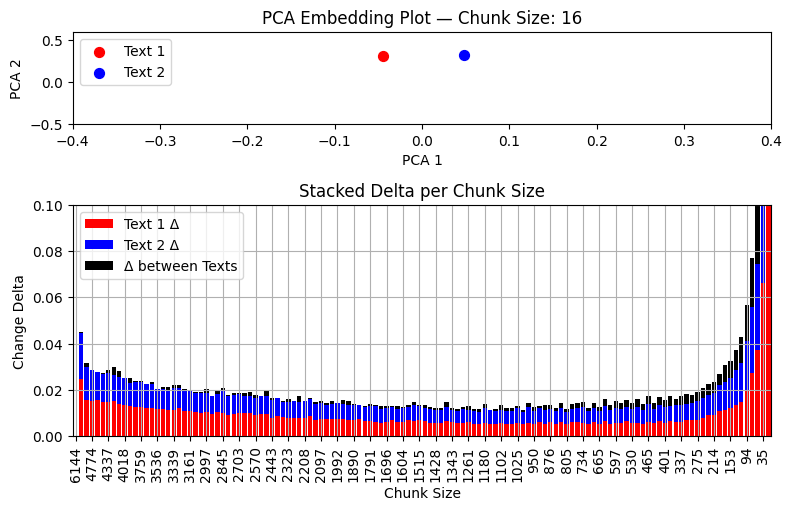

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.decomposition import PCA
from scipy.interpolate import make_interp_spline

# Distances
dist_g1 = [0] + [np.linalg.norm(embeddings_g1[i] - embeddings_g1[i-1]) for i in range(1, len(embeddings_g1))]
dist_g2 = [0] + [np.linalg.norm(embeddings_g2[i] - embeddings_g2[i-1]) for i in range(1, len(embeddings_g2))]
dist_c  = [np.linalg.norm(embeddings_g1[i] - embeddings_g2[i]) for i in range(len(embeddings_g1))]
dist_c_delta = [0] + [dist_c[i] - dist_c[i-1] for i in range(1, len(dist_c))]

pca = PCA(n_components=2)
centroids_2d = pca.fit_transform(np.array(embeddings_g1 + embeddings_g2))
centroids_g1_2d = centroids_2d[:len(embeddings_g1)]
centroids_g2_2d = centroids_2d[len(embeddings_g1):]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 5), height_ratios=[0.4, 1])

point1 = ax1.scatter([], [], color='red', s=50, label='Text 1')
point2 = ax1.scatter([], [], color='blue', s=50, label='Text 2')
ax1.set_title("PCA Embedding Plot")
ax1.legend(loc='upper left')
ax1.set_xlabel("PCA 1")
ax1.set_ylabel("PCA 2")

bars1 = ax2.bar([], [], color='red', label='Text 1 Δ')
bars2 = ax2.bar([], [], bottom=[], color='blue', label='Text 2 Δ')
bars3 = ax2.bar([], [], bottom=[], color='black', label='Δ between Texts')
ax2.set_title("Stacked Delta per Chunk Size")
ax2.legend(loc='upper left')
ax2.set_xlabel("Chunk Size")
ax2.set_ylabel("Change Delta")

def init():
    ax1.set_xlim(-0.4, 0.4)
    ax1.set_ylim(-0.5, 0.6)
    
    ax2.set_xlim(-0.5, len(embeddings_g1) - 0.5)
    ax2.set_ylim(0, 0.1)

    step = 3
    xticks = list(range(0, len(chunk_sizes), step))
    ax2.set_xticks(xticks)
    ax2.set_xticklabels([str(chunk_sizes[i]) for i in xticks])
    ax2.grid(True)
    for label in ax2.get_xticklabels():
        label.set_rotation(90)
    
    return point1, point2, *bars1, *bars2, *bars3

def update(frame):
    x1, y1 = centroids_g1_2d[frame]
    x2, y2 = centroids_g2_2d[frame]

    ax1.set_title(f"PCA Embedding Plot — Chunk Size: {chunk_sizes[frame]}")

    point1.set_offsets([[x1, y1]])
    point2.set_offsets([[x2, y2]])

    # Stack bar values
    x_vals = list(range(frame + 1))
    g1_vals = [abs(v) for v in dist_g1[:frame + 1]]
    g2_vals = [abs(v) for v in dist_g2[:frame + 1]]
    c_vals  = [abs(v) for v in dist_c_delta[:frame + 1]]

    ax2.cla()
    ax2.set_xlim(-0.5, len(embeddings_g1) - 0.5)
    ax2.set_ylim(0, 0.1)
    ax2.set_title("Stacked Delta per Chunk Size")
    ax2.grid(True)
    ax2.set_xticks(list(range(0, len(chunk_sizes), 3)))
    ax2.set_xticklabels([str(chunk_sizes[i]) for i in range(0, len(chunk_sizes), 3)])
    for label in ax2.get_xticklabels():
        label.set_rotation(90)

    ax2.bar(x_vals, g1_vals, color='red', label='Text 1 Δ')
    ax2.bar(x_vals, g2_vals, bottom=g1_vals, color='blue', label='Text 2 Δ')
    ax2.bar(x_vals, c_vals, bottom=np.array(g1_vals) + np.array(g2_vals), color='black', label='Δ between Texts')
    ax2.legend(loc='upper left')
    ax2.set_xlabel("Chunk Size")
    ax2.set_ylabel("Change Delta")

    return point1, point2

ani = FuncAnimation(fig, update, frames=len(embeddings_g1), init_func=init, blit=False)
plt.tight_layout()
ani.save("./plot_exports/centroid_evolution.gif", writer='pillow', fps=24)


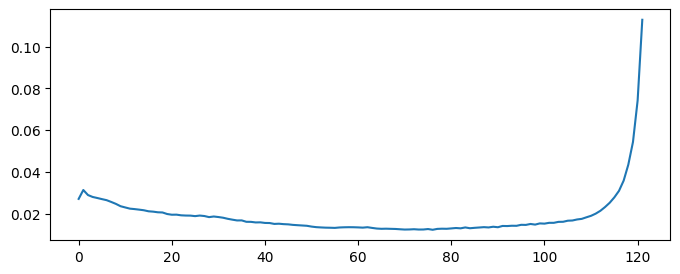

np.int64(1076)

In [25]:
total_deltas = [abs(g1) + abs(g2) + abs(c) for g1, g2, c in zip(dist_g1, dist_g2, dist_c_delta)]
k = 7 
mov_avg = np.convolve(total_deltas, np.ones(k)/k, mode='valid')
plt.figure(figsize=(8, 3))
plt.plot(mov_avg)
plt.show()
min_idx = np.argmin(mov_avg)
best_chunk = chunk_sizes[min_idx + k // 2]  # center of window
best_chunk